# Cleaning and Reshaping Data

![Gathering Data](../images/11.png)

In [1]:
from dask.diagnostics import ProgressBar
import pandas as pd
import os
import dask
import dask.dataframe as dd
import numpy as np
from dask.distributed import LocalCluster, Client
from glob import glob
import urllib
from PIL import Image
import requests
from io import BytesIO

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
cluster = LocalCluster()
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:52777 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 8.59 GB


In [3]:
all_files = '/Volumes/LaCie SSD/projects/scipy20jp_data'

In [4]:
path = '../data'

In [5]:
def check_or_add(old_path, *args):
    
    """
    This function will help us check whether one or more directories exists, and
    if they don't exist, it will create, combine, and return a new directory.
    """
        
    if not os.path.exists(os.path.join(old_path, *args)):
        os.makedirs(os.path.join(old_path, *args))

    return os.path.join(old_path, *args)

In [6]:
bel_path = check_or_add(path, 'belgium_data')

Before we even start reading in files, we should acknowledge that all businesses change throughout their active years, hence, we should not expect to see a business 

In [7]:
ddf = dd.read_csv(os.path.join(bel_path, 'csv_files','belgium_52.csv'))
ddf

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object,float64,int64,object,object,object,object,object,object,object,float64,object,object,object,float64,float64,float64,object,object,object,object,float64,object,float64,object,object,float64,object,object,object,object,float64,float64,object,object,object,int64,float64,int64,float64,object,object,float64,object,object,object,object,object,int64,object,int64,int64,int64,int64,int64,int64,float64,float64,object,object,int64,int64,int64,int64,object,int64,int64,object,object,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,object,object,object,object,object,int64,int64,int64,int64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [8]:
ddf_columns = dd.read_csv(os.path.join(bel_path, 'csv_files','belgium_52.csv')).columns
ddf_columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [9]:
ddf.head()

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+----------------------------------------------+---------+----------+
| Column                                       | Found   | Expected |
+----------------------------------------------+---------+----------+
| accommodates                                 | float64 | int64    |
| availability_30                              | float64 | int64    |
| availability_365                             | float64 | int64    |
| availability_60                              | float64 | int64    |
| availability_90                              | float64 | int64    |
| bedrooms                                     | float64 | int64    |
| calculated_host_listings_count               | float64 | int64    |
| calculated_host_listings_count_entire_homes  | float64 | int64    |
| calculated_host_listings_count_private_rooms | float64 | int64    |
| calculated_host_listings_count_shared_rooms  | float64 | int64    |
| guests_included                              | float64 | int64    |
| host_acceptance_rate                         | object  | float64  |
| host_id                                      | float64 | int64    |
| host_neighbourhood                           | object  | float64  |
| host_total_listings_count                    | object  | float64  |
| id                                           | object  | int64    |
| maximum_maximum_nights                       | object  | int64    |
| maximum_minimum_nights                       | float64 | int64    |
| maximum_nights                               | float64 | int64    |
| maximum_nights_avg_ntm                       | object  | float64  |
| minimum_maximum_nights                       | float64 | int64    |
| minimum_minimum_nights                       | object  | int64    |
| minimum_nights                               | float64 | int64    |
| minimum_nights_avg_ntm                       | object  | float64  |
| neighbourhood_group_cleansed                 | object  | float64  |
| number_of_reviews                            | float64 | int64    |
| number_of_reviews_ltm                        | float64 | int64    |
| scrape_id                                    | object  | int64    |
| thumbnail_url                                | object  | float64  |
| xl_picture_url                               | object  | float64  |
+----------------------------------------------+---------+----------+

The following columns also raised exceptions on conversion:

- host_acceptance_rate
  ValueError("could not convert string to float: 'Townhouse'")
- host_neighbourhood
  ValueError("could not convert string to float: 'Stalingrad'")
- host_total_listings_count
  ValueError("could not convert string to float: 'Real Bed'")
- id
  ValueError("invalid literal for int() with base 10: 'You can expect a warm a multi-ethnic welcome in a cosy house. Always eager to give good info on our city.'")
- maximum_maximum_nights
  ValueError('cannot convert float NaN to integer')
- maximum_nights_avg_ntm
  ValueError("could not convert string to float: 'moderate'")
- minimum_minimum_nights
  ValueError('cannot convert float NaN to integer')
- minimum_nights_avg_ntm
  ValueError("could not convert string to float: 'f'")
- neighbourhood_group_cleansed
  ValueError("could not convert string to float: '$6.00'")
- scrape_id
  ValueError("invalid literal for int() with base 10: '100%'")
- thumbnail_url
  ValueError("could not convert string to float: 'Oud - Berchem'")
- xl_picture_url
  ValueError("could not convert string to float: 'Flanders'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'accommodates': 'float64',
       'availability_30': 'float64',
       'availability_365': 'float64',
       'availability_60': 'float64',
       'availability_90': 'float64',
       'bedrooms': 'float64',
       'calculated_host_listings_count': 'float64',
       'calculated_host_listings_count_entire_homes': 'float64',
       'calculated_host_listings_count_private_rooms': 'float64',
       'calculated_host_listings_count_shared_rooms': 'float64',
       'guests_included': 'float64',
       'host_acceptance_rate': 'object',
       'host_id': 'float64',
       'host_neighbourhood': 'object',
       'host_total_listings_count': 'object',
       'id': 'object',
       'maximum_maximum_nights': 'object',
       'maximum_minimum_nights': 'float64',
       'maximum_nights': 'float64',
       'maximum_nights_avg_ntm': 'object',
       'minimum_maximum_nights': 'float64',
       'minimum_minimum_nights': 'object',
       'minimum_nights': 'float64',
       'minimum_nights_avg_ntm': 'object',
       'neighbourhood_group_cleansed': 'object',
       'number_of_reviews': 'float64',
       'number_of_reviews_ltm': 'float64',
       'scrape_id': 'object',
       'thumbnail_url': 'object',
       'xl_picture_url': 'object'}

to the call to `read_csv`/`read_table`.

We probably don't have the same columns in all of the files, and, in addition, we won't have the same order or the same data type for each column. 

Let's create a function to get the columns in our datasets

In [9]:
def get_columns(data):
    df_cols = list(pd.read_csv(data, low_memory=False, encoding='utf-8').columns)
    return df_cols

In [10]:
our_countries_data = glob(os.path.join(path, '*', 'csv_files', '*.csv'))
our_countries_data[:30]

['../data/japan_data/csv_files/japan_9.csv',
 '../data/japan_data/csv_files/japan_8.csv',
 '../data/japan_data/csv_files/japan_10.csv',
 '../data/japan_data/csv_files/japan_6.csv',
 '../data/japan_data/csv_files/japan_7.csv',
 '../data/japan_data/csv_files/japan_11.csv',
 '../data/japan_data/csv_files/japan_13.csv',
 '../data/japan_data/csv_files/japan_5.csv',
 '../data/japan_data/csv_files/japan_4.csv',
 '../data/japan_data/csv_files/japan_12.csv',
 '../data/japan_data/csv_files/japan_0.csv',
 '../data/japan_data/csv_files/japan_1.csv',
 '../data/japan_data/csv_files/japan_15.csv',
 '../data/japan_data/csv_files/japan_3.csv',
 '../data/japan_data/csv_files/japan_2.csv',
 '../data/japan_data/csv_files/japan_14.csv',
 '../data/cape-town_data/csv_files/cape-town_29.csv',
 '../data/cape-town_data/csv_files/cape-town_28.csv',
 '../data/cape-town_data/csv_files/cape-town_38.csv',
 '../data/cape-town_data/csv_files/cape-town_39.csv',
 '../data/cape-town_data/csv_files/cape-town_34.csv',
 '..

In [11]:
len(our_countries_data)

40

Explain the future

In [12]:
%%time

all_cols = []

for file in our_countries_data:
    cols = client.submit(get_columns, file)
    all_cols.append(cols)

CPU times: user 12.1 ms, sys: 2.55 ms, total: 14.6 ms
Wall time: 13.5 ms


In [13]:
all_cols[:5]

[<Future: pending, key: get_columns-b2eff658dc323c6d2c6b1d3a29d5593a>,
 <Future: pending, key: get_columns-b6d75eb2fea707274aac7ff202165824>,
 <Future: pending, key: get_columns-83bcb1dceda1b6d1bdd0e939afe0318d>,
 <Future: pending, key: get_columns-711b904e29f8ab796eb5e3d09d545e5c>,
 <Future: pending, key: get_columns-383c32a19444f2aa4b0beac7a68b8ad6>]

In [14]:
%%time

results = [cols.result() for cols in all_cols]
results

CPU times: user 959 ms, sys: 111 ms, total: 1.07 s
Wall time: 9.54 s


[['id',
  'listing_url',
  'scrape_id',
  'last_scraped',
  'name',
  'summary',
  'space',
  'description',
  'experiences_offered',
  'neighborhood_overview',
  'notes',
  'transit',
  'access',
  'interaction',
  'house_rules',
  'thumbnail_url',
  'medium_url',
  'picture_url',
  'xl_picture_url',
  'host_id',
  'host_url',
  'host_name',
  'host_since',
  'host_location',
  'host_about',
  'host_response_time',
  'host_response_rate',
  'host_acceptance_rate',
  'host_is_superhost',
  'host_thumbnail_url',
  'host_picture_url',
  'host_neighbourhood',
  'host_listings_count',
  'host_total_listings_count',
  'host_verifications',
  'host_has_profile_pic',
  'host_identity_verified',
  'street',
  'neighbourhood',
  'neighbourhood_cleansed',
  'neighbourhood_group_cleansed',
  'city',
  'state',
  'zipcode',
  'market',
  'smart_location',
  'country_code',
  'country',
  'latitude',
  'longitude',
  'is_location_exact',
  'property_type',
  'room_type',
  'accommodates',
  'bathro

In [15]:
len(results)

40

Awesome! It only took a few seconds so we ended up saving ourselves a ton of time. Imagine what it would have taken us to check the columns of every dataset 1 by 1?

![Can't imagine](https://media.giphy.com/media/3ohjV3KahwmqwPwQLu/giphy.gif)

## Exercise 1

1. Get the length of each list of columns with a submit object and add it to a list.

2. Calculate the average amount of columns from such list.

Answers below!

In [16]:
%%time

all_nums = []

for file in our_countries_data:
    cols = client.submit(get_columns, file)
    nums = client.submit(len, cols)
    all_nums.append(nums)

CPU times: user 12 ms, sys: 5.11 ms, total: 17.1 ms
Wall time: 16.7 ms


In [17]:
%%time

num_results = [num.result() for num in all_nums]
np.mean(num_results), num_results[:5]

CPU times: user 61.3 ms, sys: 8.63 ms, total: 70 ms
Wall time: 105 ms


(106.0, [106, 106, 106, 106, 106])

The next step we will take is to gather all columns in common in our data sample.

We will first import the reduce function from the standard library functools. We will then create an anonymous lambda function that takes set `x` and grabs the intersection of such set with that of `y`. This way, we will make sure we grab only the columns in common with both (or more) of our countries.

In [18]:
from functools import reduce

In [19]:
func = lambda x, y: set(x).intersection(set(y))

Explain reduce and explain laziness

In [20]:
%%time

clean_cols = list(reduce(func, filter(None, results)))
clean_cols[:5]

CPU times: user 621 µs, sys: 372 µs, total: 993 µs
Wall time: 1.77 ms


['bathrooms', 'latitude', 'country', 'requires_license', 'price']

Let's check out how many columns we are left with

In [21]:
clean_cols

['bathrooms',
 'latitude',
 'country',
 'requires_license',
 'price',
 'calculated_host_listings_count_private_rooms',
 'review_scores_value',
 'country_code',
 'review_scores_cleanliness',
 'zipcode',
 'calculated_host_listings_count_shared_rooms',
 'calendar_updated',
 'minimum_nights_avg_ntm',
 'calculated_host_listings_count_entire_homes',
 'is_location_exact',
 'require_guest_phone_verification',
 'beds',
 'summary',
 'host_response_time',
 'street',
 'minimum_minimum_nights',
 'notes',
 'maximum_nights_avg_ntm',
 'last_scraped',
 'host_verifications',
 'amenities',
 'review_scores_rating',
 'guests_included',
 'experiences_offered',
 'host_is_superhost',
 'host_listings_count',
 'smart_location',
 'maximum_maximum_nights',
 'longitude',
 'space',
 'description',
 'calendar_last_scraped',
 'cancellation_policy',
 'review_scores_communication',
 'minimum_nights',
 'market',
 'neighbourhood_cleansed',
 'jurisdiction_names',
 'review_scores_checkin',
 'thumbnail_url',
 'review_scores

In [22]:
len(clean_cols)

106

Time to help dask help us even further. Comma Separated Values tend to be quite messy, especially when they have a multiple columns with many quotations and commas. When this happens, one or more can easily find its way into the wrong spot.

To start things off we will read in the data with all columns as strings (or python objects). The reason behind this is that the way dask read and interprets the data going into a dataframe, is by selecting a small sample of rows from all columns and inferring from them the data type that might be available in it. You can already imagine that with columns with many valid elements such date, unique identifiers for purchases, etc., some are bound to miss the mark and thus make dask evaluate the data type incorrectly.

talk about blocksize, sample size and so forth

In essence, we will read everything in as a string work our way through each column to get rid or missing values and reshape whatever needs to be reshaped into a better feature.

In [23]:
dtypes = {col:np.str for col in clean_cols}
dtypes

{'bathrooms': str,
 'latitude': str,
 'country': str,
 'requires_license': str,
 'price': str,
 'calculated_host_listings_count_private_rooms': str,
 'review_scores_value': str,
 'country_code': str,
 'review_scores_cleanliness': str,
 'zipcode': str,
 'calculated_host_listings_count_shared_rooms': str,
 'calendar_updated': str,
 'minimum_nights_avg_ntm': str,
 'calculated_host_listings_count_entire_homes': str,
 'is_location_exact': str,
 'require_guest_phone_verification': str,
 'beds': str,
 'summary': str,
 'host_response_time': str,
 'street': str,
 'minimum_minimum_nights': str,
 'notes': str,
 'maximum_nights_avg_ntm': str,
 'last_scraped': str,
 'host_verifications': str,
 'amenities': str,
 'review_scores_rating': str,
 'guests_included': str,
 'experiences_offered': str,
 'host_is_superhost': str,
 'host_listings_count': str,
 'smart_location': str,
 'maximum_maximum_nights': str,
 'longitude': str,
 'space': str,
 'description': str,
 'calendar_last_scraped': str,
 'cancella

In [24]:
del all_cols
del all_nums
del results
del num_results
del cols
del nums

## Let's Clean These Data A Bit!

Now we can finally read in our data and begin the cleaning process. To do this, we will use 


![Gathering Data](../images/12.png)

In [25]:
ddf = dd.read_csv(os.path.join(path, '*_data', 'csv_files','*.csv'),
                  usecols=dtypes.keys(), 
                  dtype=dtypes,
                  blocksize=None,                  
)
ddf

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
npartitions=40,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Be careful when calling `.head()` and `.tail()` as dask will proceed to compute those operations on the fly.




In [26]:
ddf.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,50904,https://www.airbnb.com/rooms/50904,20191025033440,2019-10-25,super cosy suite - fashion district,Decorated in a vintage style combined with a f...,Aplace Antwerp is located on a charming little...,Decorated in a vintage style combined with a f...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/f14b0908-c...,NaN,234077,https://www.airbnb.com/users/show/234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Since my childhoocd I dreamt of having my own ...,a few days or more,40%,NaN,f,https://a0.muscache.com/im/pictures/user/9cdb3...,https://a0.muscache.com/im/pictures/user/9cdb3...,NaN,4.0,4.0,"['email', 'phone', 'google', 'reviews', 'offli...",t,f,"Antwerp, Flanders, Belgium",NaN,Historisch Centrum,NaN,Antwerp,Flanders,2000.0,Antwerp,"Antwerp, Belgium",BE,Belgium,51.218579999999996,4.3985,t,Boutique hotel,Hotel room,2,1.0,1,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Paid parking off...",NaN,$145.00,NaN,NaN,$250.00,$25.00,1,$0.00,1,60,1,3,40,60,1.4,43.2,today,t,28,54,84,264,2019-10-25,1,0,2015-05-06,2015-05-06,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,0,0,0,0.02
1,116134,https://www.airbnb.com/rooms/116134,20191025033440,2019-10-25,Trendy Vacation Apartment Antwerp,Enjoy your stay at our 4 person apartment in t...,"You'll have the chance to stay in a very nice,...",Enjoy your stay at our 4 person apartment in t...,none,"The area ""`t eilandje"" is located at the old h...",Hou rekening met Lage Emissie Zone! meer info ...,NaN,As a guest you'll have access to all possible ...,We will be available to assist you with all qu...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/23732573/0...,NaN,586942,https://www.airbnb.com/users/show/586942,Paul,2011-05-14,"Kapellen, Flemish Region, Belgium",My wife Gina and I will be glad to welcome you...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/586942/profil...,https://a0.muscache.com/im/users/586942/profil...,NaN,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'selfie...",t,t,"Antwerp, Flemish Region, Belgium",NaN,Eilandje,NaN,Antwerp,Flemish Region,2000.0,Antwerp,"Antwerp, Belgium",BE,Belgium,51.230509999999995,4.405930000000001,t,Apartment,Entire home/apt,4,2.0,2,2.0,Real Bed,"{TV,""Cable TV"",Inte

Let's now check out how even our partitions may or may not be. We will do so with ...



In [27]:
%%time

ddf.map_partitions(len).compute()

CPU times: user 1.71 s, sys: 265 ms, total: 1.97 s
Wall time: 15.4 s


0      2258
1      2448
2      2366
3      2431
4      2423
5      2241
6      2251
7      2388
8      2282
9      2469
10     2414
11     2271
12    24079
13    24347
14    24197
15    23095
16    24404
17    23251
18    24062
19    24318
20    24458
21    24591
22    23551
23    23368
24    10081
25    13762
26    15551
27    13152
28    10754
29    14715
30    15352
31    11877
32    14941
33    12832
34    15009
35    11466
36    12438
37    15925
38    14550
39     9769
dtype: int64

Since our partitions are way too uneven, we will repartition our dataset using ..

We will start creating a cleaning pipeline in the form of a Directed Acyclical Graph.

DAGs are

DAGs in dask allows us

We will first repartition

In [28]:
%%time

ddf1 = ddf.repartition(partition_size='150MB')
ddf1.npartitions

CPU times: user 2.32 s, sys: 531 ms, total: 2.85 s
Wall time: 20.8 s


55

In [29]:
%%time

ddf1.map_partitions(len).compute()

CPU times: user 2.55 s, sys: 360 ms, total: 2.91 s
Wall time: 20.1 s


0     14167
1     14075
2     12039
3     12040
4     12173
5     12174
6     12098
7     12099
8     11547
9     11548
10    12202
11    12202
12    11625
13    11626
14    12031
15    12031
16    12159
17    12159
18    12229
19    12229
20    12295
21    12296
22    11775
23    11776
24    11684
25    11684
26    10081
27     6881
28     6881
29     7775
30     7776
31     6576
32     6576
33    10754
34     7357
35     7358
36     7676
37     7676
38     5938
39     5939
40     7470
41     7471
42     6416
43     6416
44     7504
45     7505
46     5733
47     5733
48     6219
49     6219
50     7962
51     7963
52     7275
53     7275
54     9769
dtype: int64

We will then check for missing values

In [30]:
%%time

# Get the raw count of missing values in all columns
missing_values = ddf1.isna().sum()

# Divide it by the total size of the dataset and multiply by 100 to get the % of the total
missing_pct = ((missing_values / ddf1.index.size) * 100).compute()
missing_pct

CPU times: user 5.81 s, sys: 1.07 s, total: 6.88 s
Wall time: 38.1 s


id                                                0.000000
listing_url                                       0.000000
scrape_id                                         0.000000
last_scraped                                      0.001325
name                                              0.002461
summary                                           2.202648
space                                            21.782795
description                                       1.421222
experiences_offered                               0.000000
neighborhood_overview                            27.317722
notes                                            44.007521
transit                                          26.836219
access                                           36.516283
interaction                                      32.935583
house_rules                                      46.496269
thumbnail_url                                    99.997728
medium_url                                      100.0000

We will start by selecting a few thresholds. If the columns has less than 5...

Notice that our missing_count_pct is a pandas series and the column names of our dataframe are the index of our series

we will use masking

In [31]:
rows_to_drop = list(missing_pct[(missing_pct <= 5) & (missing_pct > 0)].index)

## Exercise 2

1. Create a list of the columns to drop. These columns should have more than or equal to 50% of missing values. Name this variable `cols_to_drop`.

2. Create a list of columns to fix. These columns should have between 5% and 50% of missing values (exclusive of these two numbers). Name this new variable `fix_these_columns`.

In [32]:
cols_to_drop = list(missing_pct[(missing_pct >= 50)].index)
# cols_to_drop[:5]

In [33]:
fix_these_columns = list(missing_pct[(missing_pct > 5) & (missing_pct < 50)].index)
# fix_these_columns[:5]

In [34]:
rows_to_drop

['last_scraped',
 'name',
 'summary',
 'description',
 'host_name',
 'host_since',
 'host_location',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'number_of_reviews

In [35]:
print(f'We will drop rows from {len(rows_to_drop)} columns with less than 5% of observations missing. Wow!')

We will drop rows from 65 columns with less than 5% of observations missing. Wow!


In [36]:
ddf2 = ddf1.dropna(subset=rows_to_drop)

Now let's move on to the columns we would like to drop because they have more than half of their sample missing.

In [37]:
cols_to_drop

['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'host_neighbourhood',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'license',
 'jurisdiction_names']

In [38]:
an_image = ddf.loc[ddf['picture_url'].notnull(), 'picture_url']
a = an_image.loc[2].compute()
a.head()

2    https://a0.muscache.com/im/pictures/b1160bc2-9...
2    https://a0.muscache.com/im/pictures/391aac86-f...
2    https://a0.muscache.com/im/pictures/391aac86-f...
2    https://a0.muscache.com/im/pictures/391aac86-f...
2    https://a0.muscache.com/im/pictures/391aac86-f...
Name: picture_url, dtype: object

In [39]:
def image_show(img_url):
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    return img

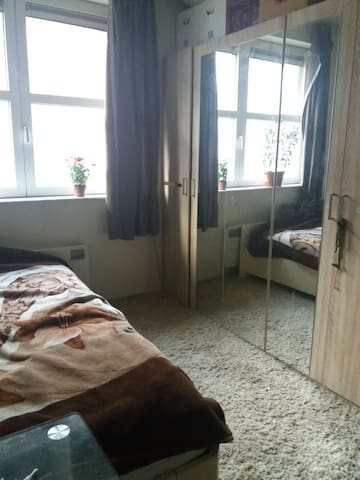

In [40]:
image_show(a.iloc[5])

Let's now drop the columns with over 60% missing values

In [41]:
ddf3 = ddf2.drop(cols_to_drop, axis=1)

In [42]:
ddf3[fix_these_columns].head()

,space,neighborhood_overview,notes,transit,access,interaction,house_rules,host_about,host_response_time,host_response_rate,security_deposit,cleaning_fee,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,Aplace Antwerp is located on a charming little...,NaN,NaN,NaN,NaN,NaN,NaN,Since my childhoocd I dreamt of having my own ...,a few days or more,40%,$250.00,$25.00,2015-05-06,2015-05-06,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.02
1,"You'll have the chance to stay in a very nice,...","The area ""`t eilandje"" is located at the old h...",Hou rekening met Lage Emissie Zone! meer info ...,NaN,As a guest you'll have access to all possible ...,We will be available to assist you with all qu...,NaN,My wife Gina and I will be glad to welcome you...,within an hour,100%,$250.00,$80.00,2012-03-05,2019-10-13,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0.96
3,My house is too big for me currently to use th...,The house is located in one of the most beauti...,NaN,Parking space available in front of the house,"Bedroom, kitchen, bathroom, terrace, garden",I will be either in the house or available via...,Lease of bedroom includes right of use of 1 (s...,"I am a person with a job in research, and I li...",within an hour,100%,$400.00,$0.00,2011-09-19,2011-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01
5,We welcome you on the ground floor of our hous...,NaN,"A touristtax of 2,25€ pro person pro night is ...",NaN,The entire groundfloor apartment and garden.,NaN,"no pets, no smoking inside","I'm a reader, gardener and I like meeting peop...",within an hour,100%,NaN,$20.00,2012-05-12,2019-10-20,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0.55
6,SHORT AND LONG TERM free use of bike A GREAT...,NaN,NaN,NaN,NaN,NaN,free use of the fuly equiped kitchen free use...,"We, Lieve (52 y.) Fronk (49 y.) and Aurora (18...",within a few hours,100%,$0.00,$10.00,2012-03-29,2019-09-15,91.0,9.0,9.0,10.0,10.0,9.0,9.0,1.13


Let's pick the non-numerical variables and fill in any missing values using the word "Unknown"

In [43]:
non_numerical_vars = ['space', 'neighborhood_overview', 'notes', 'transit', 'access',
                      'interaction', 'house_rules', 'host_about', 'host_response_time']

In [44]:
unknown_condition = {col:'Unknown' for col in non_numerical_vars}
unknown_condition

{'space': 'Unknown',
 'neighborhood_overview': 'Unknown',
 'notes': 'Unknown',
 'transit': 'Unknown',
 'access': 'Unknown',
 'interaction': 'Unknown',
 'house_rules': 'Unknown',
 'host_about': 'Unknown',
 'host_response_time': 'Unknown'}

In [45]:
ddf4 = ddf3.fillna(unknown_condition)

In [46]:
ddf4.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,50904,https://www.airbnb.com/rooms/50904,20191025033440,2019-10-25,super cosy suite - fashion district,Decorated in a vintage style combined with a f...,Aplace Antwerp is located on a charming little...,Decorated in a vintage style combined with a f...,none,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,https://a0.muscache.com/im/pictures/f14b0908-c...,234077,https://www.airbnb.com/users/show/234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Since my childhoocd I dreamt of having my own ...,a few days or more,40%,f,https://a0.muscache.com/im/pictures/user/9cdb3...,https://a0.muscache.com/im/pictures/user/9cdb3...,4.0,4.0,"['email', 'phone', 'google', 'reviews', 'offli...",t,f,"Antwerp, Flanders, Belgium",Historisch Centrum,Antwerp,Flanders,2000.0,Antwerp,"Antwerp, Belgium",BE,Belgium,51.218579999999996,4.3985,t,Boutique hotel,Hotel room,2,1.0,1,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Paid parking off...",$145.00,$250.00,$25.00,1,$0.00,1,60,1,3,40,60,1.4,43.2,today,t,28,54,84,264,2019-10-25,1,0,2015-05-06,2015-05-06,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,4,0,0,0,0.02
1,116134,https://www.airbnb.com/rooms/116134,20191025033440,2019-10-25,Trendy Vacation Apartment Antwerp,Enjoy your stay at our 4 person apartment in t...,"You'll have the chance to stay in a very nice,...",Enjoy your stay at our 4 person apartment in t...,none,"The area ""`t eilandje"" is located at the old h...",Hou rekening met Lage Emissie Zone! meer info ...,Unknown,As a guest you'll have access to all possible ...,We will be available to assist you with all qu...,Unknown,https://a0.muscache.com/im/pictures/23732573/0...,586942,https://www.airbnb.com/users/show/586942,Paul,2011-05-14,"Kapellen, Flemish Region, Belgium",My wife Gina and I will be glad to welcome you...,within an hour,100%,t,https://a0.muscache.com/im/users/586942/profil...,https://a0.muscache.com/im/users/586942/profil...,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'selfie...",t,t,"Antwerp, Flemish Region, Belgium",Eilandje,Antwerp,Flemish Region,2000.0,Antwerp,"Antwerp, Belgium",BE,Belgium,51.230509999999995,4.405930000000001,t,Apartment,Entire home/apt,4,2.0,2,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",$150.00,$250.00,$80.00,1,$0.00,2,30,2,2,30,30,2.0,30.0,2 weeks ago,t,26,53,70,328,2019-10-25,89,20,2012-03-05,2019-10-13,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,strict_14_with_grace_period,f,f,1,1,0,

Let's get the rest of the variables and switch them to numerical ones

In [47]:
set_of_cols_left = set(fix_these_columns).difference(set(non_numerical_vars))
set_of_cols_left

{'cleaning_fee',
 'first_review',
 'host_response_rate',
 'last_review',
 'review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'reviews_per_month',
 'security_deposit'}

We will take out the dates varaibles as we will have to deal with these in a different manner later on

In [48]:
set_of_cols_left.remove('first_review')
set_of_cols_left.remove('last_review')

In [49]:
ddf4[list(set_of_cols_left)].head()

,host_response_rate,review_scores_rating,security_deposit,review_scores_cleanliness,cleaning_fee,review_scores_checkin,review_scores_location,review_scores_value,review_scores_communication,reviews_per_month,review_scores_accuracy
0,40%,100.0,$250.00,10.0,$25.00,10.0,10.0,10.0,10.0,0.02,10.0
1,100%,99.0,$250.00,10.0,$80.00,10.0,10.0,10.0,10.0,0.96,10.0
3,100%,NaN,$400.00,NaN,$0.00,NaN,NaN,NaN,NaN,0.01,NaN
5,100%,95.0,NaN,10.0,$20.00,10.0,9.0,10.0,10.0,0.55,10.0
6,100%,91.0,$0.00,9.0,$10.00,10.0,9.0,9.0,10.0,1.13,9.0


Sometimes we do have to take care of things manuallu

In [50]:
from string import punctuation, digits, ascii_letters
ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [51]:
puncs = ''.join(punctuation.split('.'))
digits += '.'
puncs, digits

('!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~', '0123456789.')

In [52]:
def remove_puncs(string_piece):
    if string_piece:
        string = str(string_piece).strip()
        clean_str = ''.join([num2.strip() for num2 in string if num2 not in ascii_letters])
        clean_str1 = ''.join([num.strip() for num in clean_str if num not in puncs])
        clean_str2 = ''.join([num3 for num3 in clean_str1 if num3 in digits])
        return clean_str2
    else:
        return np.nan

In [53]:
some_list = [np.nan, '〒1690072', '%%7.0', '0.5%', 'nan', '$39.0', '$23.56']

liset = []
for s in some_list:
    liset.append(remove_puncs(s))

In [54]:
for i in list(filter(None, liset)):
    print(float(i))

1690072.0
7.0
0.5
39.0
23.56


In [55]:
%%time

from collections import defaultdict

strip_type_col = defaultdict(dask.dataframe.Series)

for col in set_of_cols_left:
    strip_type_col[col] = ddf4[col].apply(lambda x: pd.to_numeric(remove_puncs(x), 'coerce'), meta=('x', 'str')).astype(np.float32)

CPU times: user 39.6 ms, sys: 16.7 ms, total: 56.3 ms
Wall time: 57.5 ms


In [56]:
ddf5 = ddf4.drop(list(strip_type_col.keys()), axis=1)

In [57]:
ddf6 = ddf5.assign(**strip_type_col)

In [58]:
ddf6.tail()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_response_rate,review_scores_rating,security_deposit,review_scores_cleanliness,cleaning_fee,review_scores_checkin,review_scores_location,review_scores_value,review_scores_communication,reviews_per_month,review_scores_accuracy
9763,33279293,https://www.airbnb.com/rooms/33279293,20190325164012,2019-03-25,10mins to sta. 5mins to Ikebukuro 4pax&wifi FF257,10mis walk from Oyama station to my apartment ...,Please refer to the list below for the ameniti...,10mis walk from Oyama station to my apartment ...,none,From Oyama station (Tobu Tojo line) to my plac...,Please keep the room clean and tidy as if it’s...,From Oyama station to... Shibuya station...27m...,The room is yours during your stay. Feel free ...,Always contact me via Airbnb for smooth commun...,- 土足厳禁/Take off your shoes - 21時以降は静かに/Keep qu...,https://a0.muscache.com/im/pictures/5aec6b03-9...,225846430,https://www.airbnb.com/users/show/225846430,Miyu,2018-11-15,"Tokyo, Japan",Hello everyone!\r\nI'm a Japanese teacher in S...,within an hour,f,https://a0.muscache.com/im/pictures/user/fe3d4...,https://a0.muscache.com/im/pictures/user/fe3d4...,19,19,"['email', 'phone']",t,f,"Itabashi City, Tōkyō-to, Japan",Itabashi Ku,Itabashi City,Tōkyō-to,173-0025,Tokyo,"Itabashi City, Japan",JP,Japan,35.74132,139.70618000000002,t,Boutique hotel,Private room,4,1.0,0.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...","$40,022.00",4,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,today,t,2,22,52,53,2019-03-25,0,0,NaN,NaN,t,t,f,moderate,f,f,19,2,17,0,100.0,NaN,25000.0,NaN,7560.0,NaN,NaN,NaN,NaN,NaN,NaN
9764,33280222,https://www.airbnb.com/rooms/33280222,20190325164012,2019-03-25,｢AB4- Near Shinjuku｣4min ShinOkubo Sta - Free ...,この物件は､日本の宿泊事業法に則った､基準を満たし､許可を得た物件になっております 新大久保...,新大久保駅から徒歩4分の場所にあり､新宿ｴﾘｱですが､とても静かな住宅街にあります ･成田空...,この物件は､日本の宿泊事業法に則った､基準を満たし､許可を得た物件になっております 新大久保...,none,Shin Okubo is a cozy little neighborhood locat...,予約完了後､写真付きのｱﾊﾟｰﾄまでの道順を記載したｶﾞｲﾄﾞを送ります｡ 2018年6月1...,山手線 - 新大塚駅まで徒歩4分 中央本線 - 大久保駅まで徒歩6分 施設の裏側に有料の駐車...,ﾁｪｯｸｲﾝﾏﾆｭｱﾙに記載があります｡,Unknown,◾“NO SMOKING on the property except the balcon...,https://a0.muscache.com/im/pictures/298a5c49-4...,208210870,https://www.airbnb.com/users/show/208210870,Alo,2018-08-08,"Arakawa, Tokyo, Japan",『 STAY IN JAPAN 』\r\n\r\n泊まることが､旅になる｡,within an hour,f,https://a0.muscache.com/im/pictures/user/72a4f...,https://a0.muscache.com/im/pictures/user/72a4f...,6,6,"['email', 'phone', 'google', 'offline_governme...",t,f,"新宿区, 東京都, Japan",Shinjuku Ku,新宿区,東京都,169-0072,Tokyo,"新宿区, Japan",JP,Japan,35.70138,139.70161000000002,f,Apartment,Entire home/apt,4,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...","$11,985.00",2,"$3,000.00",1,

In [59]:
ddf6.loc[:, list(strip_type_col.keys())].dtypes

host_response_rate             float32
review_scores_rating           float32
security_deposit               float32
review_scores_cleanliness      float32
cleaning_fee                   float32
review_scores_checkin          float32
review_scores_location         float32
review_scores_value            float32
review_scores_communication    float32
reviews_per_month              float32
review_scores_accuracy         float32
dtype: object

In [60]:
%%time

missing_values = ddf6.isna().sum()
whats_left_pct = ((missing_values / ddf6.index.size) * 100).compute()
whats_left_pct

CPU times: user 14.9 s, sys: 2.17 s, total: 17.1 s
Wall time: 1min 47s


id                                               0.000000
listing_url                                      0.000000
scrape_id                                        0.000000
last_scraped                                     0.000000
name                                             0.000000
summary                                          0.000000
space                                            0.000000
description                                      0.000000
experiences_offered                              0.000000
neighborhood_overview                            0.000000
notes                                            0.000000
transit                                          0.000000
access                                           0.000000
interaction                                      0.000000
house_rules                                      0.000000
picture_url                                      0.000000
host_id                                          0.000000
host_url      

Talk about persisting ...

In [61]:
ddf7 = ddf6.persist()

In [62]:
list(strip_type_col.keys())

['host_response_rate',
 'review_scores_rating',
 'security_deposit',
 'review_scores_cleanliness',
 'cleaning_fee',
 'review_scores_checkin',
 'review_scores_location',
 'review_scores_value',
 'review_scores_communication',
 'reviews_per_month',
 'review_scores_accuracy']

I took the liberty of gathering the float and int numerical vars and put them into two lists

In [63]:
float_numericals = ['latitude', 'longitude', 'bathrooms', 'price', 
                   'extra_people', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']

int_numericals = ['accommodates', 'guests_included', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
                  'maximum_maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews',
                  'number_of_reviews_ltm', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'bedrooms', 'beds',
                  'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_listings_count', 'host_total_listings_count', ]

In [65]:
float_vars_set = set(float_numericals).intersection(set(ddf7.columns))
float_vars_set

{'bathrooms',
 'extra_people',
 'latitude',
 'longitude',
 'maximum_nights_avg_ntm',
 'minimum_nights_avg_ntm',
 'price'}

In [66]:
len(int_numericals)

20

In [67]:
int_vars_set = set(int_numericals).intersection(set(ddf7.columns))
len(int_vars_set),int_vars_set

(20,
 {'accommodates',
  'availability_30',
  'availability_365',
  'availability_60',
  'availability_90',
  'bedrooms',
  'beds',
  'calculated_host_listings_count',
  'calculated_host_listings_count_entire_homes',
  'calculated_host_listings_count_private_rooms',
  'calculated_host_listings_count_shared_rooms',
  'guests_included',
  'host_listings_count',
  'host_total_listings_count',
  'maximum_maximum_nights',
  'maximum_minimum_nights',
  'minimum_maximum_nights',
  'minimum_minimum_nights',
  'number_of_reviews',
  'number_of_reviews_ltm'})

In [68]:
%%time

dict_numerical_cols = defaultdict(dask.dataframe.Series)

for col in float_vars_set:
    dict_numerical_cols[col] = ddf7[col].apply(lambda x: remove_puncs(x), meta=('x', 'float32')).astype(np.float32)
    
for col in int_vars_set:
    dict_numerical_cols[col] = ddf7[col].apply(lambda x: remove_puncs(x), meta=('x', 'float32')).astype(np.float32).astype(np.int32)

CPU times: user 94.3 ms, sys: 59.6 ms, total: 154 ms
Wall time: 255 ms


In [69]:
dict_numerical_cols.keys()

dict_keys(['extra_people', 'bathrooms', 'latitude', 'maximum_nights_avg_ntm', 'longitude', 'price', 'minimum_nights_avg_ntm', 'availability_90', 'availability_60', 'calculated_host_listings_count_private_rooms', 'availability_30', 'calculated_host_listings_count', 'calculated_host_listings_count_shared_rooms', 'calculated_host_listings_count_entire_homes', 'maximum_minimum_nights', 'number_of_reviews', 'host_total_listings_count', 'beds', 'availability_365', 'minimum_minimum_nights', 'guests_included', 'host_listings_count', 'maximum_maximum_nights', 'accommodates', 'bedrooms', 'minimum_maximum_nights', 'number_of_reviews_ltm'])

In [70]:
len(dict_numerical_cols.keys())

27

In [71]:
ddf8 = ddf7.drop(list(dict_numerical_cols.keys()), axis=1)

In [72]:
ddf9 = ddf8.assign(**dict_numerical_cols)

In [73]:
ddf9.tail()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,minimum_nights,maximum_nights,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_response_rate,review_scores_rating,security_deposit,review_scores_cleanliness,cleaning_fee,review_scores_checkin,review_scores_location,review_scores_value,review_scores_communication,reviews_per_month,review_scores_accuracy,extra_people,bathrooms,latitude,maximum_nights_avg_ntm,longitude,price,minimum_nights_avg_ntm,availability_90,availability_60,calculated_host_listings_count_private_rooms,availability_30,calculated_host_listings_count,calculated_host_listings_count_shared_rooms,calculated_host_listings_count_entire_homes,maximum_minimum_nights,number_of_reviews,host_total_listings_count,beds,availability_365,minimum_minimum_nights,guests_included,host_listings_count,maximum_maximum_nights,accommodates,bedrooms,minimum_maximum_nights,number_of_reviews_ltm
9763,33279293,https://www.airbnb.com/rooms/33279293,20190325164012,2019-03-25,10mins to sta. 5mins to Ikebukuro 4pax&wifi FF257,10mis walk from Oyama station to my apartment ...,Please refer to the list below for the ameniti...,10mis walk from Oyama station to my apartment ...,none,From Oyama station (Tobu Tojo line) to my plac...,Please keep the room clean and tidy as if it’s...,From Oyama station to... Shibuya station...27m...,The room is yours during your stay. Feel free ...,Always contact me via Airbnb for smooth commun...,- 土足厳禁/Take off your shoes - 21時以降は静かに/Keep qu...,https://a0.muscache.com/im/pictures/5aec6b03-9...,225846430,https://www.airbnb.com/users/show/225846430,Miyu,2018-11-15,"Tokyo, Japan",Hello everyone!\r\nI'm a Japanese teacher in S...,within an hour,f,https://a0.muscache.com/im/pictures/user/fe3d4...,https://a0.muscache.com/im/pictures/user/fe3d4...,"['email', 'phone']",t,f,"Itabashi City, Tōkyō-to, Japan",Itabashi Ku,Itabashi City,Tōkyō-to,173-0025,Tokyo,"Itabashi City, Japan",JP,Japan,t,Boutique hotel,Private room,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",1,1125,today,t,2019-03-25,NaN,NaN,t,t,f,moderate,f,f,100.0,NaN,25000.0,NaN,7560.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,35.741322,1125.0,139.706177,40022.0,1.0,52,22,17,2,19,0,2,1,0,19,2,53,1,4,19,1125,4,0,1125,0
9764,33280222,https://www.airbnb.com/rooms/33280222,20190325164012,2019-03-25,｢AB4- Near Shinjuku｣4min ShinOkubo Sta - Free ...,この物件は､日本の宿泊事業法に則った､基準を満たし､許可を得た物件になっております 新大久保...,新大久保駅から徒歩4分の場所にあり､新宿ｴﾘｱですが､とても静かな住宅街にあります ･成田空...,この物件は､日本の宿泊事業法に則った､基準を満たし､許可を得た物件になっております 新大久保...,none,Shin Okubo is a cozy little neighborhood locat...,予約完了後､写真付きのｱﾊﾟｰﾄまでの道順を記載したｶﾞｲﾄﾞを送ります｡ 2018年6月1...,山手線 - 新大塚駅まで徒歩4分 中央本線 - 大久保駅まで徒歩6分 施設の裏側に有料の駐車...,ﾁｪｯｸｲﾝﾏﾆｭｱﾙに記載があります｡,Unknown,◾“NO SMOKING on the property except the balcon...,https://a0.muscache.com/im/pictures/298a5c49-4...,208210870,https://www.airbnb.com/users/show/208210870,Alo,2018-08-08,"Arakawa, Tokyo, Japan",『 STAY IN JAPAN 』\r\n\r\n泊まることが､旅になる｡,within an hour,f,https://a0.muscache.com/im/pictures/user/72a4f...,https://a0.muscache.com/im/pictures/user/72a4f...,"['email', 'phone', 'google', 'offline_governme...",t,f,"新宿区, 東京都, Japan",Shinjuku Ku,新宿区,東京都,169-0072,Tokyo,"新宿区, Japan",JP,Japan,f,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",1,1125,today,t,2019-03-25,NaN,NaN,t,t,f,moderate,f,f,100.0,NaN,20000.0,NaN,5800.0,NaN,NaN,NaN

In [74]:
ddf9.dtypes

id                                               object
listing_url                                      object
scrape_id                                        object
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
picture_url                                      object
host_id                                          object
host_url                                        

In [75]:
%%time

missing_values = ddf9.isna().sum()
whats_left_pct = ((missing_values / ddf9.index.size) * 100).compute()
whats_left_pct

CPU times: user 6.36 s, sys: 1.27 s, total: 7.63 s
Wall time: 48.1 s


id                                               0.000000
listing_url                                      0.000000
scrape_id                                        0.000000
last_scraped                                     0.000000
name                                             0.000000
summary                                          0.000000
space                                            0.000000
description                                      0.000000
experiences_offered                              0.000000
neighborhood_overview                            0.000000
notes                                            0.000000
transit                                          0.000000
access                                           0.000000
interaction                                      0.000000
house_rules                                      0.000000
picture_url                                      0.000000
host_id                                          0.000000
host_url      

In [76]:
ddf9['host_id'].nunique().compute()

23583

In [77]:
len(ddf9)

483531

In [78]:
%%time

host_frequency = ddf9.groupby('host_id')['host_id'].count().compute()

CPU times: user 4.13 s, sys: 525 ms, total: 4.65 s
Wall time: 25.6 s


In [79]:
host_frequency.head(10)

host_id
10026319     24
10038260     24
10048055     12
10090207     12
10117688     12
101262040    31
101477048    12
10149448      5
101646939     5
101655527     5
Name: host_id, dtype: int64

In [80]:
ddf9.loc[ddf9['host_id'] == '10026319'].head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,minimum_nights,maximum_nights,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_response_rate,review_scores_rating,security_deposit,review_scores_cleanliness,cleaning_fee,review_scores_checkin,review_scores_location,review_scores_value,review_scores_communication,reviews_per_month,review_scores_accuracy,extra_people,bathrooms,latitude,maximum_nights_avg_ntm,longitude,price,minimum_nights_avg_ntm,availability_90,availability_60,calculated_host_listings_count_private_rooms,availability_30,calculated_host_listings_count,calculated_host_listings_count_shared_rooms,calculated_host_listings_count_entire_homes,maximum_minimum_nights,number_of_reviews,host_total_listings_count,beds,availability_365,minimum_minimum_nights,guests_included,host_listings_count,maximum_maximum_nights,accommodates,bedrooms,minimum_maximum_nights,number_of_reviews_ltm
372,10604260,https://www.airbnb.com/rooms/10604260,20191025033440,2019-10-25,Historical City Antwerp.,The best place to stay if you like to be in th...,Our rooms are nice and spacious. You stay in a...,The best place to stay if you like to be in th...,none,In the middle of the historical city of Antwerp,Staying in our house you have to be able to cl...,Tram 10 and 11 from Central station stop in ou...,Beside your own room you can relax in the down...,We will be available to let you know where wha...,Respectful towards other guest and host! No pets!,https://a0.muscache.com/im/pictures/bb95f83e-3...,10026319,https://www.airbnb.com/users/show/10026319,Marc,2013-11-15,Belgium,"Hello,\r\n\r\nI was born in the Netherlands an...",within a few hours,t,https://a0.muscache.com/im/users/10026319/prof...,https://a0.muscache.com/im/users/10026319/prof...,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Antwerpen, Vlaanderen, Belgium",Universiteitsbuurt,Antwerpen,Vlaanderen,2000.0,Antwerp,"Antwerpen, Belgium",BE,Belgium,t,House,Private room,Real Bed,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",1,1125,2 weeks ago,t,2019-10-25,2016-01-25,2019-09-29,f,f,f,flexible,f,f,100.0,98.0,NaN,10.0,NaN,10.0,10.0,10.0,10.0,4.31,10.0,20.0,1.0,51.220139,1125.0,4.40545,60.0,1.0,82,54,2,25,2,0,0,1,197,2,1,357,1,1,2,1125,2,1,1125,32
373,10693965,https://www.airbnb.com/rooms/10693965,20191025033440,2019-10-25,Antwerp center city,Our place is right in the heart of the histori...,It is situated in the center if the old town. ...,Our place is right in the heart of the histori...,none,The neighborhood is in the historical part of ...,Unknown,The easiest is just to walk into the city ther...,You will enter the house through the Downstair...,I will be present to help you out with any kin...,Respect to other guests and host! And keep the...,https://a0.muscache.com/im/pictures/7f1451c9-c...,10026319,https://www.airbnb.com/users/show/10026319,Marc,2013-11-15,Belgium,"Hello,\r\n\r\nI was born in the Netherlands an...",within a few hours,t,https://a0.muscache.com/im/users/10026319/prof...,https://a0.muscache.com/im/users/10026319/prof...,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Antwerpen, Vlaanderen, Belgium",Historisch Centrum,Antwerpen,Vlaanderen,2000.0,Antwerp,"Antwerpen, Belgium",BE,Belgium,t,Townhouse,Private room,Real Bed,"{TV,""Cable TV"",Wifi,""Paid parking off premises...",1,1125,4 weeks ago,t,2019-10-25,2016-02-2

In [81]:
id_frequency = ddf9.groupby('id')['id'].count().compute()

In [82]:
len(id_frequency), id_frequency.head(10)

(51418,
 id
 10004342    12
 10015096    12
 10050755    12
 10170353    12
 10172878    11
 10196951    12
 10220506    12
 10286773    12
 10293949    12
 10375108    12
 Name: id, dtype: int64)

In [83]:
id_frequency.sum()

483531

In [84]:
ddf9.loc[ddf9['id'] == '10015096'].head(20)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,minimum_nights,maximum_nights,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_response_rate,review_scores_rating,security_deposit,review_scores_cleanliness,cleaning_fee,review_scores_checkin,review_scores_location,review_scores_value,review_scores_communication,reviews_per_month,review_scores_accuracy,extra_people,bathrooms,latitude,maximum_nights_avg_ntm,longitude,price,minimum_nights_avg_ntm,availability_90,availability_60,calculated_host_listings_count_private_rooms,availability_30,calculated_host_listings_count,calculated_host_listings_count_shared_rooms,calculated_host_listings_count_entire_homes,maximum_minimum_nights,number_of_reviews,host_total_listings_count,beds,availability_365,minimum_minimum_nights,guests_included,host_listings_count,maximum_maximum_nights,accommodates,bedrooms,minimum_maximum_nights,number_of_reviews_ltm
357,10015096,https://www.airbnb.com/rooms/10015096,20191025033440,2019-10-25,2 slpk appartement op toplocatie,"Located at the heart of this beautiful, hip an...","The appartment offers a spacious living, dinin...","Located at the heart of this beautiful, hip an...",none,Mechelseplein accomodates some of the most ico...,The appartment is in a quiet building. Most ne...,You can easily reach Tica'Home via public tran...,Unknown,It is our aim to give you the best experience ...,No smoking or pets allowed. We are Airbnb-fans...,https://a0.muscache.com/im/pictures/843eb28c-b...,51433236,https://www.airbnb.com/users/show/51433236,Tinne,2015-12-15,"Antwerp, Flanders, Belgium",Ik geniet er ontzettend van om samen met mijn ...,within an hour,t,https://a0.muscache.com/im/pictures/08e2ae99-3...,https://a0.muscache.com/im/pictures/08e2ae99-3...,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Antwerpen, Vlaanderen, Belgium",Theaterbuurt-Meir,Antwerpen,Vlaanderen,2000.0,Antwerp,"Antwerpen, Belgium",BE,Belgium,t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",2,1125,3 days ago,t,2019-10-25,2016-02-14,2019-10-06,f,t,f,moderate,f,f,100.0,97.0,0.0,10.0,45.0,10.0,10.0,9.0,10.0,3.22,10.0,40.0,1.0,51.21225,1125.0,4.40518,80.0,2.0,50,20,0,10,1,0,1,2,145,1,4,140,2,2,1,1125,4,2,1125,30
349,10015096,https://www.airbnb.com/rooms/10015096,20200227171200,2020-02-27,2 slpk appartement op toplocatie,"Located at the heart of this beautiful, hip an...","The appartment offers a spacious living, dinin...","Located at the heart of this beautiful, hip an...",none,Mechelseplein accomodates some of the most ico...,The appartment is in a quiet building. Most ne...,You can easily reach Tica'Home via public tran...,Unknown,It is our aim to give you the best experience ...,No smoking or pets allowed. We are Airbnb-fans...,https://a0.muscache.com/im/pictures/5196ced3-2...,51433236,https://www.airbnb.com/users/show/51433236,Tinne,2015-12-15,"Antwerp, Flanders, Belgium",Ik geniet er ontzettend van om samen met mijn ...,within an hour,f,https://a0.muscache.com/im/pictures/user/08e2a...,https://a0.muscache.com/im/pictures/user/08e2a...,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Antwerpen, Vlaanderen, Belgium",Theaterbuurt-Meir,Antwerpen,Vlaanderen,2000.0,Antwerp,"Antwerpen, Belgium",BE,Belgium,t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",2,1125,t

In [85]:
q_data = ddf9.loc[ddf9['id'] == '10004342'].head(20)
q_data.loc[356, 'description'] == q_data.loc[373, 'description']

True

In [86]:
numerical_left_to_fill = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_rating', 'cleaning_fee',
                          'host_response_rate', 'review_scores_communication', 'reviews_per_month', 'review_scores_location', 
                          'security_deposit', 'review_scores_value', 'review_scores_checkin']

dates_left = ['first_review', 'last_review']

In [87]:
ddf9[numerical_left_to_fill].describe().compute()

,review_scores_accuracy,review_scores_cleanliness,review_scores_rating,cleaning_fee,host_response_rate,review_scores_communication,reviews_per_month,review_scores_location,security_deposit,review_scores_value,review_scores_checkin
count,370078.000000,370119.000000,370220.000000,390227.000000,384797.000000,370077.000000,375698.000000,370036.000000,362560.000000,369980.000000,370040.000000
mean,9.599252,9.458855,93.771606,3191.358138,95.780622,9.731940,1.451746,9.571350,7707.440777,9.382591,9.719303
std,0.821225,0.925434,8.243085,4646.723145,14.987334,0.721884,1.472531,0.747189,23260.605469,0.878975,0.725003
min,2.000000,2.000000,20.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000
25%,10.000000,9.000000,93.000000,300.000000,100.000000,10.000000,0.700000,10.000000,0.000000,9.000000,10.000000
50%,10.000000,10.000000,97.000000,4000.000000,100.000000,10.000000,1.510000,10.000000,2000.000000,10.000000,10.000000
75%,10.000000,10.000000,100.000000,8800.000000,100.000000,10.000000,3.440000,10.000000,20000.000000,10.000000,10.000000
max,10.000000,10.000000,100.000000,100000.000000,100.000000,10.000000,58.029999,10.000000,560000.000000,10.000000,10.000000


Before we deal with these vars, we want to first figure out how to get rid of duplicates

## Exercise 3

1. What do you think will happen once we get rid of duplicates, will we have more missing values as a percentage of the total or less?

**Hint:** This is a trick question!

In [88]:
dups = ddf9.map_partitions(lambda x: x.duplicated())

In [89]:
dups.sum().compute()

0

In [90]:
def get_rid_of_duplicates(data, last_scraped_col, id_col):
    data1 = data.sort_values(by=last_scraped_col, ascending=False)
    data2 = data1.drop_duplicates(subset=id_col)
    return data2

In [91]:
ddf10 = ddf9.map_partitions(get_rid_of_duplicates, last_scraped_col='last_scraped', id_col='id')

In [92]:
ddf10.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,minimum_nights,maximum_nights,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_response_rate,review_scores_rating,security_deposit,review_scores_cleanliness,cleaning_fee,review_scores_checkin,review_scores_location,review_scores_value,review_scores_communication,reviews_per_month,review_scores_accuracy,extra_people,bathrooms,latitude,maximum_nights_avg_ntm,longitude,price,minimum_nights_avg_ntm,availability_90,availability_60,calculated_host_listings_count_private_rooms,availability_30,calculated_host_listings_count,calculated_host_listings_count_shared_rooms,calculated_host_listings_count_entire_homes,maximum_minimum_nights,number_of_reviews,host_total_listings_count,beds,availability_365,minimum_minimum_nights,guests_included,host_listings_count,maximum_maximum_nights,accommodates,bedrooms,minimum_maximum_nights,number_of_reviews_ltm
1698,36106533,https://www.airbnb.com/rooms/36106533,20200622052900,2020-06-23,130m² house near station & sportpaleis + parking,"Light, well-furnished and spacious house close...",Unknown,"Light, well-furnished and spacious house close...",none,Unknown,Unknown,Unknown,een gezellig groot huis met alle voorzieningen,We live and work nearby so we are available f...,Unknown,https://a0.muscache.com/im/pictures/ccc474f1-c...,271595247,https://www.airbnb.com/users/show/271595247,Jean And Karolien,2019-06-26,"Antwerp, Flanders, Belgium",Unknown,within an hour,t,https://a0.muscache.com/im/pictures/user/9a918...,https://a0.muscache.com/im/pictures/user/9a918...,"['email', 'phone']",t,f,"Antwerpen, Vlaanderen, Belgium",Borgerhout Intra Muros Noord,Antwerpen,Vlaanderen,2140.0,Antwerp,"Antwerpen, Belgium",BE,Belgium,t,Townhouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",1,1125,4 weeks ago,t,2020-06-23,2019-07-21,2020-06-12,f,t,f,flexible,f,f,100.0,95.0,0.0,10.0,40.0,10.0,9.0,10.0,10.0,3.01,10.0,20.0,1.5,51.221039,1125.000000,4.44066,159.0,1.0,66,40,0,21,1,0,1,1,34,1,6,331,1,3,1,1125,7,2,1125,34
178,6051973,https://www.airbnb.com/rooms/6051973,20200622052900,2020-06-22,"Welcome @Tempor'area, reopening June 8th! :-)",Located in the heart of Antwerp but still in a...,"The apartment is in total 110 sqm, modernly de...",Located in the heart of Antwerp but still in a...,none,The apartment is located in the heart of Antwe...,You will find a modern kitchen fully equipped ...,"There's a tram only 100 metres away, together ...",Only in 15 minutes walking distance from the C...,I'm always happy to help with any questions or...,Only 6 people are allowed to sleep in the apar...,https://a0.muscache.com/im/pictures/ac8c402f-9...,3970988,https://www.airbnb.com/users/show/3970988,Arthur,2012-10-25,"Antwerpen, Vlaams Gewest, Belgium","Hallo, ik ben Arthur en verhuur sinds een dik ...",Unknown,t,https://a0.muscache.com/im/pictures/user/ec955...,https://a0.muscache.com/im/pictures/user/ec955...,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Antwerp, Flanders, Belgium",Theaterbuurt-Meir,Antwerp,Flanders,2000.0,Antwerp,"Antwerp, Belgium",BE,Belgium,t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",2,1125,4 weeks ago,t,2020-06-22,2015-04-26,2020-02-21,f,f,f,moderate,f,f,NaN,99.0,200.0,10.0,45.0,10.0,10.0,9.0,10.0,1.02,10.0,23.0,1.5,51.213360,1125.000000,4.40

In [93]:
len(ddf9)

483531

In [94]:
len(ddf10)

463701

In [95]:
type(ddf9)

dask.dataframe.core.DataFrame

In [96]:
parts_lenght = ddf9.map_partitions(len).compute()
parts_lenght

0     12784
1     12687
2     11344
3     10729
4     11467
5     10842
6     11395
7     10913
8     10863
9     10562
10    11497
11    10972
12    10952
13    10593
14    11332
15    10700
16    11460
17    10832
18    11501
19    11020
20    11579
21    10978
22    11078
23    10704
24    10992
25    10660
26     9123
27     6202
28     6360
29     7014
30     7193
31     5879
32     6079
33     9808
34     6664
35     6694
36     6946
37     6988
38     5215
39     5617
40     6749
41     6912
42     5725
43     5959
44     6803
45     6842
46     5003
47     5465
48     5480
49     5844
50     7207
51     7247
52     6548
53     6707
54     8822
dtype: int64

In [97]:
parts_lenght.std()

2437.7435897623873

In [98]:
ddf10p2 = ddf9.map_overlap(get_rid_of_duplicates, before=2000, after=2000, last_scraped_col='last_scraped', id_col='id')
ddf10p2.tail()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,minimum_nights,maximum_nights,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_response_rate,review_scores_rating,security_deposit,review_scores_cleanliness,cleaning_fee,review_scores_checkin,review_scores_location,review_scores_value,review_scores_communication,reviews_per_month,review_scores_accuracy,extra_people,bathrooms,latitude,maximum_nights_avg_ntm,longitude,price,minimum_nights_avg_ntm,availability_90,availability_60,calculated_host_listings_count_private_rooms,availability_30,calculated_host_listings_count,calculated_host_listings_count_shared_rooms,calculated_host_listings_count_entire_homes,maximum_minimum_nights,number_of_reviews,host_total_listings_count,beds,availability_365,minimum_minimum_nights,guests_included,host_listings_count,maximum_maximum_nights,accommodates,bedrooms,minimum_maximum_nights,number_of_reviews_ltm
3189,23153956,https://www.airbnb.com/rooms/23153956,20190325164012,2019-03-25,Nishigahara 2mins Neat&Clean Private Room B2,A comfortable private room in neat and clean h...,Home is newly built in 2015 situated in Kita W...,A comfortable private room in neat and clean h...,none,Unknown,Unknown,Unknown,There are 4 private bed rooms in home. Kitchen...,Unknown,Unknown,https://a0.muscache.com/im/pictures/a115ca5c-e...,26341212,https://www.airbnb.com/users/show/26341212,Tombo,2015-01-19,"Kita, Tokyo, Japan",Unknown,within an hour,f,https://a0.muscache.com/im/pictures/user/898ad...,https://a0.muscache.com/im/pictures/user/898ad...,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Kita-ku, Tōkyō-to, Japan",Kita Ku,Kita-ku,Tōkyō-to,114-0024,Tokyo,"Kita-ku, Japan",JP,Japan,t,House,Private room,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,Washe...",2,1125,3 days ago,t,2019-03-25,2018-07-07,2018-07-07,t,f,f,strict_14_with_grace_period,f,f,92.0,100.0,20000.0,10.0,8000.0,10.0,10.0,10.0,10.0,0.11,10.0,1500.0,1.0,35.744869,1125.0,139.739899,5607.0,22.0,0,0,4,0,4,0,0,30,1,4,2,8,2,1,4,1125,2,1,1125,1
3188,23153415,https://www.airbnb.com/rooms/23153415,20190325164012,2019-03-25,Shinjuku Luxury Service Apartment 2 BR (NEW),"Centrally located in Shinjuku, Tokyo, this bra...","Located right in the heart of Tokyo, this 2 be...","Centrally located in Shinjuku, Tokyo, this bra...",none,Unknown,Unknown,Oedo Line Tochomae or Nishi-Shinjuku Gochome s...,Unknown,Unknown,- No shoes in the house. No loud noises after...,https://a0.muscache.com/im/pictures/346f2bbd-2...,7102543,https://www.airbnb.com/users/show/7102543,Jason,2013-06-25,Tokyo,Takes pleasure in welcoming guests to one of t...,within a few hours,f,https://a0.muscache.com/im/users/7102543/profi...,https://a0.muscache.com/im/users/7102543/profi...,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Shinjuku, Tokyo, Japan",Shinjuku Ku,Shinjuku,Tokyo,160-0023,Tokyo,"Shinjuku, Japan",JP,Japan,t,Condominium,Entire home/apt,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",30,1125,14 months ago,t,2019-03-25,2018-06-25,2019-01-06,t,f,f,moderate,f,f,100.0,100.0,NaN,10.0,NaN,10.0,10.0,10.0,10.0,0.22,10.0,0.0,1.0,35.693691,1125.0,139.685776,18032.0,30.0,22,0,0,0,1,0,1,30,2,1,2,171,30,1,1,1125,4,2,1125,2
3187,23152758,https://www.airbnb.com/rooms/23152758,20190325164012,2019-03-25,If you want to spend more comfortably@private ...,My place is an 1minute w

In [99]:
%%time
# round 1 of ddf10p2 with 2000 up and down
len(ddf9), len(ddf10), len(ddf10p2)

CPU times: user 22.8 s, sys: 3.92 s, total: 26.8 s
Wall time: 2min 50s


(483531, 463701, 450567)

In [100]:
ddf10p2.npartitions

55

In [ ]:
# round 2 of ddf10p2 with 2000 up and down
len(ddf10p2)

In [ ]:
# round 3 of ddf10p2 with 4000 up and down
len(ddf10p2)

In [102]:
id_frequency2 = ddf10p2.groupby('host_id')['host_id'].count().compute()
id_frequency2

host_id
10038260        2
10048055        2
10090207        1
10117688        1
101262040       2
101477048       1
10205913        2
103352452       2
103363284       8
1034658         2
103833743       1
104201659       2
104393507       2
104925505       1
105664328       2
105681380       2
10583986        1
10598905        6
10614479        1
106174282       1
10639073        2
10658365        4
106606088       1
10668854        2
107750838      16
107899426       2
10818677        1
10832813        1
10871925        2
10885207        1
10891625        1
109618168       3
10972397        1
110177368       2
110469250       4
11087865        3
110933932       1
110993942      16
1128692         1
113627827       2
114028473       2
114044941       3
114211617       2
11423496        2
114532208       1
115208363       4
11534275        2
11555976        1
116267895       2
1167377         2
116955185       2
11700039        2
117355259       6
117824389       1
11799871        2
11

In [103]:
ddf9[ddf9['host_id'] == '159006893'].head(20)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,minimum_nights,maximum_nights,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_response_rate,review_scores_rating,security_deposit,review_scores_cleanliness,cleaning_fee,review_scores_checkin,review_scores_location,review_scores_value,review_scores_communication,reviews_per_month,review_scores_accuracy,extra_people,bathrooms,latitude,maximum_nights_avg_ntm,longitude,price,minimum_nights_avg_ntm,availability_90,availability_60,calculated_host_listings_count_private_rooms,availability_30,calculated_host_listings_count,calculated_host_listings_count_shared_rooms,calculated_host_listings_count_entire_homes,maximum_minimum_nights,number_of_reviews,host_total_listings_count,beds,availability_365,minimum_minimum_nights,guests_included,host_listings_count,maximum_maximum_nights,accommodates,bedrooms,minimum_maximum_nights,number_of_reviews_ltm
942,21815068,https://www.airbnb.com/rooms/21815068,20191025033440,2019-10-25,The Meir Residence,Stylish apartment in the heart of Diamond capi...,Unknown,Stylish apartment in the heart of Diamond capi...,none,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,https://a0.muscache.com/im/pictures/62fee05e-9...,159006893,https://www.airbnb.com/users/show/159006893,David,2017-11-16,BE,Unknown,Unknown,f,https://a0.muscache.com/im/pictures/user/8971e...,https://a0.muscache.com/im/pictures/user/8971e...,"['email', 'phone', 'reviews']",t,f,"Antwerpen, Vlaanderen, Belgium",Historisch Centrum,Antwerpen,Vlaanderen,2000.0,Antwerp,"Antwerpen, Belgium",BE,Belgium,t,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,Elevator,Heating,""Family/kid friendly...",1,1125,18 months ago,t,2019-10-25,2017-11-25,2018-05-01,f,t,f,flexible,f,f,NaN,93.0,0.0,10.0,47.0,10.0,10.0,10.0,10.0,0.56,10.0,0.0,1.0,51.218658,1125.0,4.40408,99.0,1.0,0,0,0,0,2,0,2,1,13,2,3,0,1,1,2,1125,5,3,1125,0
1008,22712447,https://www.airbnb.com/rooms/22712447,20191025033440,2019-10-25,Meir Apartment,Stylish apartment in the heart of Diamond capi...,Unknown,Stylish apartment in the heart of Diamond capi...,none,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,https://a0.muscache.com/im/pictures/66da1084-a...,159006893,https://www.airbnb.com/users/show/159006893,David,2017-11-16,BE,Unknown,Unknown,f,https://a0.muscache.com/im/pictures/user/8971e...,https://a0.muscache.com/im/pictures/user/8971e...,"['email', 'phone', 'reviews']",t,f,"Antwerpen, Vlaanderen, Belgium",Theaterbuurt-Meir,Antwerpen,Vlaanderen,2000.0,Antwerp,"Antwerpen, Belgium",BE,Belgium,t,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,Elevator,Heating,""Family/kid friendly...",1,10,6 weeks ago,t,2019-10-25,2018-02-13,2018-04-26,f,t,f,flexible,f,f,NaN,95.0,0.0,10.0,47.0,10.0,10.0,10.0,10.0,0.63,10.0,0.0,1.0,51.217331,10.0,4.40331,75.0,1.0,0,0,0,0,2,0,2,1,13,2,5,0,1,1,2,10,5,2,10,0
893,21815068,https://www.airbnb.com/rooms/21815068,20200227171200,2020-02-27,The Meir Residence,Stylish apartment in the heart of Diamond capi...,Unknown,Stylish apartment in the heart of Diamond capi...,none,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,https://a0.muscache.com/im/pictures/62fee05e-9...,159006893,https://www.airbnb.com/users/show/159006893,David,2017-11-16,BE,Unknown,Unknown,f,https://a0.muscache.com/im/pictures/user/8971e...,https://a0.muscache.com/im/pictures/user/8971e...,"['email', 'phone', 'reviews']",t,f,"Antwer

In [104]:
mask_id = ddf10p2['host_id'].isin(['159006893'])
ddf10p2[mask_id].head(20)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,minimum_nights,maximum_nights,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_response_rate,review_scores_rating,security_deposit,review_scores_cleanliness,cleaning_fee,review_scores_checkin,review_scores_location,review_scores_value,review_scores_communication,reviews_per_month,review_scores_accuracy,extra_people,bathrooms,latitude,maximum_nights_avg_ntm,longitude,price,minimum_nights_avg_ntm,availability_90,availability_60,calculated_host_listings_count_private_rooms,availability_30,calculated_host_listings_count,calculated_host_listings_count_shared_rooms,calculated_host_listings_count_entire_homes,maximum_minimum_nights,number_of_reviews,host_total_listings_count,beds,availability_365,minimum_minimum_nights,guests_included,host_listings_count,maximum_maximum_nights,accommodates,bedrooms,minimum_maximum_nights,number_of_reviews_ltm
857,21815068,https://www.airbnb.com/rooms/21815068,20200622052900,2020-06-22,The Meir Residence,Stylish apartment in the heart of Diamond capi...,Unknown,Stylish apartment in the heart of Diamond capi...,none,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,https://a0.muscache.com/im/pictures/62fee05e-9...,159006893,https://www.airbnb.com/users/show/159006893,David,2017-11-16,BE,Unknown,Unknown,f,https://a0.muscache.com/im/pictures/user/8971e...,https://a0.muscache.com/im/pictures/user/8971e...,"['email', 'phone', 'reviews']",t,f,"Antwerpen, Vlaanderen, Belgium",Historisch Centrum,Antwerpen,Vlaanderen,2000.0,Antwerp,"Antwerpen, Belgium",BE,Belgium,t,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,Elevator,Heating,""Family/kid friendly...",1,1125,26 months ago,t,2020-06-22,2017-11-25,2018-05-01,f,t,f,flexible,f,f,NaN,93.0,0.0,10.0,47.0,10.0,10.0,10.0,10.0,0.41,10.0,0.0,1.0,51.218658,1125.0,4.40408,99.0,1.0,0,0,0,0,2,0,2,1,13,2,3,0,1,1,2,1125,5,3,1125,0
912,22712447,https://www.airbnb.com/rooms/22712447,20200622052900,2020-06-22,Meir Apartment,Stylish apartment in the heart of Diamond capi...,Unknown,Stylish apartment in the heart of Diamond capi...,none,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,https://a0.muscache.com/im/pictures/66da1084-a...,159006893,https://www.airbnb.com/users/show/159006893,David,2017-11-16,BE,Unknown,Unknown,f,https://a0.muscache.com/im/pictures/user/8971e...,https://a0.muscache.com/im/pictures/user/8971e...,"['email', 'phone', 'reviews']",t,f,"Antwerpen, Vlaanderen, Belgium",Theaterbuurt-Meir,Antwerpen,Vlaanderen,2000.0,Antwerp,"Antwerpen, Belgium",BE,Belgium,t,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,Elevator,Heating,""Family/kid friendly...",1,10,10 months ago,t,2020-06-22,2018-02-13,2018-04-26,f,t,f,flexible,f,f,NaN,95.0,0.0,10.0,47.0,10.0,10.0,10.0,10.0,0.45,10.0,0.0,1.0,51.217331,10.0,4.40331,75.0,1.0,0,0,0,0,2,0,2,1,13,2,5,0,1,1,2,10,5,2,10,0


In [105]:
im = ddf10p2.loc[mask_id, 'picture_url'].compute()
im[912]

'https://a0.muscache.com/im/pictures/66da1084-a7b7-47bc-9998-8cdba0312a74.jpg?aki_policy=large'

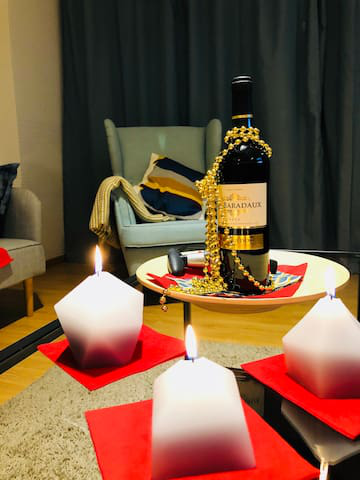

In [108]:
image_show(im[857])

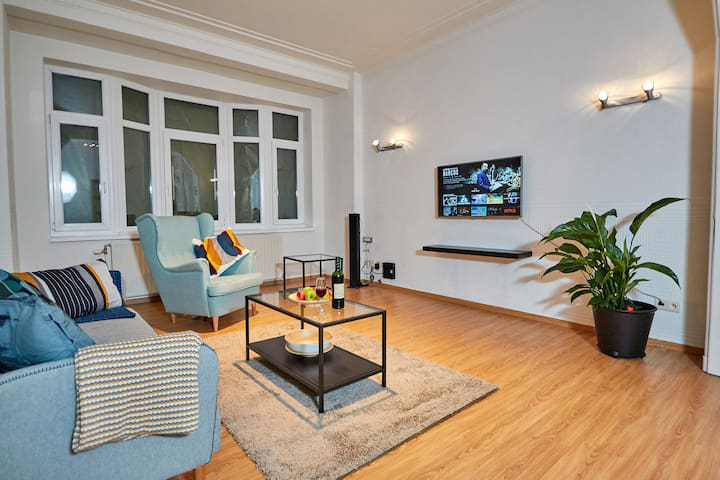

In [107]:
image_show(im[912])

In [109]:
%%time

missing_values = ddf10p2.isna().sum()
whats_left_pct = ((missing_values / ddf10p2.index.size) * 100).compute()
whats_left_pct

CPU times: user 8.44 s, sys: 1.33 s, total: 9.77 s
Wall time: 46.9 s


id                                               0.000000
listing_url                                      0.000000
scrape_id                                        0.000000
last_scraped                                     0.000000
name                                             0.000000
summary                                          0.000000
space                                            0.000000
description                                      0.000000
experiences_offered                              0.000000
neighborhood_overview                            0.000000
notes                                            0.000000
transit                                          0.000000
access                                           0.000000
interaction                                      0.000000
house_rules                                      0.000000
picture_url                                      0.000000
host_id                                          0.000000
host_url      

Convert all dates to datetime

If an observation has comments but no first in last out date range, use the day they became a host as a proxy and the date that observation was last scraped

In [110]:
time_mask = ((ddf10p2['first_review'].isnull()) & (ddf10p2['last_review'].isnull()) & (ddf10p2['review_scores_value'].notnull()))

temp = ddf10p2[time_mask]#, ['host_since', 'last_scraped']].head()

In [111]:
len(temp)

0

In [112]:
(ddf10p2['first_review'].isna().sum() / len(ddf10p2) * 100).compute()

23.09312488486729

In [113]:
ddf10p2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,minimum_nights,maximum_nights,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_response_rate,review_scores_rating,security_deposit,review_scores_cleanliness,cleaning_fee,review_scores_checkin,review_scores_location,review_scores_value,review_scores_communication,reviews_per_month,review_scores_accuracy,extra_people,bathrooms,latitude,maximum_nights_avg_ntm,longitude,price,minimum_nights_avg_ntm,availability_90,availability_60,calculated_host_listings_count_private_rooms,availability_30,calculated_host_listings_count,calculated_host_listings_count_shared_rooms,calculated_host_listings_count_entire_homes,maximum_minimum_nights,number_of_reviews,host_total_listings_count,beds,availability_365,minimum_minimum_nights,guests_included,host_listings_count,maximum_maximum_nights,accommodates,bedrooms,minimum_maximum_nights,number_of_reviews_ltm
1698,36106533,https://www.airbnb.com/rooms/36106533,20200622052900,2020-06-23,130m² house near station & sportpaleis + parking,"Light, well-furnished and spacious house close...",Unknown,"Light, well-furnished and spacious house close...",none,Unknown,Unknown,Unknown,een gezellig groot huis met alle voorzieningen,We live and work nearby so we are available f...,Unknown,https://a0.muscache.com/im/pictures/ccc474f1-c...,271595247,https://www.airbnb.com/users/show/271595247,Jean And Karolien,2019-06-26,"Antwerp, Flanders, Belgium",Unknown,within an hour,t,https://a0.muscache.com/im/pictures/user/9a918...,https://a0.muscache.com/im/pictures/user/9a918...,"['email', 'phone']",t,f,"Antwerpen, Vlaanderen, Belgium",Borgerhout Intra Muros Noord,Antwerpen,Vlaanderen,2140.0,Antwerp,"Antwerpen, Belgium",BE,Belgium,t,Townhouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",1,1125,4 weeks ago,t,2020-06-23,2019-07-21,2020-06-12,f,t,f,flexible,f,f,100.0,95.0,0.0,10.0,40.0,10.0,9.0,10.0,10.0,3.01,10.0,20.0,1.5,51.221039,1125.000000,4.44066,159.0,1.0,66,40,0,21,1,0,1,1,34,1,6,331,1,3,1,1125,7,2,1125,34
178,6051973,https://www.airbnb.com/rooms/6051973,20200622052900,2020-06-22,"Welcome @Tempor'area, reopening June 8th! :-)",Located in the heart of Antwerp but still in a...,"The apartment is in total 110 sqm, modernly de...",Located in the heart of Antwerp but still in a...,none,The apartment is located in the heart of Antwe...,You will find a modern kitchen fully equipped ...,"There's a tram only 100 metres away, together ...",Only in 15 minutes walking distance from the C...,I'm always happy to help with any questions or...,Only 6 people are allowed to sleep in the apar...,https://a0.muscache.com/im/pictures/ac8c402f-9...,3970988,https://www.airbnb.com/users/show/3970988,Arthur,2012-10-25,"Antwerpen, Vlaams Gewest, Belgium","Hallo, ik ben Arthur en verhuur sinds een dik ...",Unknown,t,https://a0.muscache.com/im/pictures/user/ec955...,https://a0.muscache.com/im/pictures/user/ec955...,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Antwerp, Flanders, Belgium",Theaterbuurt-Meir,Antwerp,Flanders,2000.0,Antwerp,"Antwerp, Belgium",BE,Belgium,t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",2,1125,4 weeks ago,t,2020-06-22,2015-04-26,2020-02-21,f,f,f,moderate,f,f,NaN,99.0,200.0,10.0,45.0,10.0,10.0,9.0,10.0,1.02,10.0,23.0,1.5,51.213360,1125.000000,4.40

Let's start with security deposit . We will assume that if a value is missing, the listing doesn't requie a deposit

In [114]:
ddf10p2['security_deposit'].describe().compute()

count    338765.000000
mean       7534.076611
std       22281.097656
min           0.000000
25%           0.000000
50%        2000.000000
75%       20000.000000
max      560000.000000
Name: security_deposit, dtype: float64

In [115]:
sec_dep_des = ddf10p2.groupby('country')['security_deposit'].agg(['min', 'max', 'mean', 'count']).compute() #aggregate(['min', 'median', 'mean', 'max', 'count'])
sec_dep_des

,min,max,mean,count
country,,,,
Belgium,0.0,4397.0,186.969388,980
South Africa,0.0,250000.0,2647.981588,173800
Japan,0.0,560000.0,12756.526755,163985


In [127]:
deposit_mask = ddf10p2['security_deposit'].notnull()

security_deposit = ddf10p2['security_deposit'].where(deposit_mask, 0)

ddf11 = ddf10p2.drop(['security_deposit'], axis=1)
ddf12 = ddf11.assign(security_deposit=security_deposit)
ddf12.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,minimum_nights,maximum_nights,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_response_rate,review_scores_rating,review_scores_cleanliness,cleaning_fee,review_scores_checkin,review_scores_location,review_scores_value,review_scores_communication,reviews_per_month,review_scores_accuracy,extra_people,bathrooms,latitude,maximum_nights_avg_ntm,longitude,price,minimum_nights_avg_ntm,availability_90,availability_60,calculated_host_listings_count_private_rooms,availability_30,calculated_host_listings_count,calculated_host_listings_count_shared_rooms,calculated_host_listings_count_entire_homes,maximum_minimum_nights,number_of_reviews,host_total_listings_count,beds,availability_365,minimum_minimum_nights,guests_included,host_listings_count,maximum_maximum_nights,accommodates,bedrooms,minimum_maximum_nights,number_of_reviews_ltm,security_deposit
1698,36106533,https://www.airbnb.com/rooms/36106533,20200622052900,2020-06-23,130m² house near station & sportpaleis + parking,"Light, well-furnished and spacious house close...",Unknown,"Light, well-furnished and spacious house close...",none,Unknown,Unknown,Unknown,een gezellig groot huis met alle voorzieningen,We live and work nearby so we are available f...,Unknown,https://a0.muscache.com/im/pictures/ccc474f1-c...,271595247,https://www.airbnb.com/users/show/271595247,Jean And Karolien,2019-06-26,"Antwerp, Flanders, Belgium",Unknown,within an hour,t,https://a0.muscache.com/im/pictures/user/9a918...,https://a0.muscache.com/im/pictures/user/9a918...,"['email', 'phone']",t,f,"Antwerpen, Vlaanderen, Belgium",Borgerhout Intra Muros Noord,Antwerpen,Vlaanderen,2140.0,Antwerp,"Antwerpen, Belgium",BE,Belgium,t,Townhouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",1,1125,4 weeks ago,t,2020-06-23,2019-07-21,2020-06-12,f,t,f,flexible,f,f,100.0,95.0,10.0,40.0,10.0,9.0,10.0,10.0,3.01,10.0,20.0,1.5,51.221039,1125.000000,4.44066,159.0,1.0,66,40,0,21,1,0,1,1,34,1,6,331,1,3,1,1125,7,2,1125,34,0.0
178,6051973,https://www.airbnb.com/rooms/6051973,20200622052900,2020-06-22,"Welcome @Tempor'area, reopening June 8th! :-)",Located in the heart of Antwerp but still in a...,"The apartment is in total 110 sqm, modernly de...",Located in the heart of Antwerp but still in a...,none,The apartment is located in the heart of Antwe...,You will find a modern kitchen fully equipped ...,"There's a tram only 100 metres away, together ...",Only in 15 minutes walking distance from the C...,I'm always happy to help with any questions or...,Only 6 people are allowed to sleep in the apar...,https://a0.muscache.com/im/pictures/ac8c402f-9...,3970988,https://www.airbnb.com/users/show/3970988,Arthur,2012-10-25,"Antwerpen, Vlaams Gewest, Belgium","Hallo, ik ben Arthur en verhuur sinds een dik ...",Unknown,t,https://a0.muscache.com/im/pictures/user/ec955...,https://a0.muscache.com/im/pictures/user/ec955...,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Antwerp, Flanders, Belgium",Theaterbuurt-Meir,Antwerp,Flanders,2000.0,Antwerp,"Antwerp, Belgium",BE,Belgium,t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",2,1125,4 weeks ago,t,2020-06-22,2015-04-26,2020-02-21,f,f,f,moderate,f,f,NaN,99.0,10.0,45.0,10.0,10.0,9.0,10.0,1.02,10.0,23.0,1.5,51.213360,1125.000000,4.40415,11

In [128]:
ddf12['security_deposit'].isnull().sum().compute()

0

In [129]:
whats_left_cols = list(whats_left_pct[whats_left_pct > 0].index)

In [130]:
whats_left_cols.remove('security_deposit')

In [131]:
whats_left_cols

['first_review',
 'last_review',
 'host_response_rate',
 'review_scores_rating',
 'review_scores_cleanliness',
 'cleaning_fee',
 'review_scores_checkin',
 'review_scores_location',
 'review_scores_value',
 'review_scores_communication',
 'reviews_per_month',
 'review_scores_accuracy']

In [338]:
ddf12[whats_left_cols[2:]].head()

,review_scores_checkin,review_scores_accuracy,reviews_per_month,review_scores_cleanliness,host_response_rate,review_scores_value,review_scores_rating,review_scores_location,review_scores_communication
1698,10.0,10.0,3.01,10.0,100.0,10.0,95.0,9.0,10.0
178,10.0,10.0,1.02,10.0,NaN,9.0,99.0,10.0,10.0
781,10.0,8.0,0.52,8.0,90.0,8.0,78.0,10.0,8.0
786,10.0,10.0,1.57,10.0,NaN,10.0,97.0,9.0,10.0
785,10.0,10.0,0.15,9.0,NaN,9.0,96.0,10.0,10.0


Let's look at the distribution of the variables we have left

In [339]:
ddf12[whats_left_cols[2:]].describe().compute()

,review_scores_checkin,review_scores_accuracy,reviews_per_month,review_scores_cleanliness,host_response_rate,review_scores_value,review_scores_rating,review_scores_location,review_scores_communication
count,340617.000000,340646.000000,346517.000000,340696.000000,356049.000000,340539.000000,340792.000000,340600.000000,340664.000000
mean,9.716735,9.599432,1.408374,9.462427,95.723746,9.384397,93.784936,9.585511,9.732722
std,0.725906,0.817285,1.449530,0.921241,15.278799,0.880402,8.268022,0.738235,0.719915
min,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,20.000000,2.000000,2.000000
25%,10.000000,10.000000,0.600000,9.000000,100.000000,9.000000,93.000000,10.000000,10.000000
50%,10.000000,10.000000,1.450000,10.000000,100.000000,10.000000,98.000000,10.000000,10.000000
75%,10.000000,10.000000,3.450000,10.000000,100.000000,10.000000,100.000000,10.000000,10.000000
max,10.000000,10.000000,58.029999,10.000000,100.000000,10.000000,100.000000,10.000000,10.000000


Let's now talk about reviews

These seem to be standardize across Airbnb so we can evaluate them in combination

![reviews](../images/reviews.png)

In [342]:
ddf12.loc[ddf12['reviews_per_month'].isnull(), 'number_of_reviews'].describe().compute()

count    104050.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: number_of_reviews, dtype: float64

In [344]:
reviews_to_check = ((ddf12['review_scores_checkin'].isnull()) & (ddf12['review_scores_accuracy'].isnull()) & (ddf12['reviews_per_month'].isnull()) &
                    (ddf12['review_scores_cleanliness'].isnull()) & (ddf12['review_scores_value'].isnull()) & (ddf12['review_scores_rating'].isnull()) & 
                    (ddf12['review_scores_location'].isnull()) & (ddf12['review_scores_communication'].isnull()))

In [345]:
ddf12.loc[reviews_to_check, 'number_of_reviews'].describe().compute()

count    104050.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: number_of_reviews, dtype: float64

Awesome, we just comfirmed that indeed, these missing values are not missing because of mistakes or issues, but simply because these listings have not received a single review. This means we can go ahead and fill them up with 0s.

In [346]:
reviews_cols_list = [review for review in whats_left_cols[2:] if 'review' in review]
reviews_cols_list

['review_scores_checkin',
 'review_scores_accuracy',
 'reviews_per_month',
 'review_scores_cleanliness',
 'review_scores_value',
 'review_scores_rating',
 'review_scores_location',
 'review_scores_communication']

In [351]:
clean_reviews = defaultdict(dask.dataframe.Series)

for review_col in reviews_cols_list:
    condition = ddf12[review_col].notnull()
    clean_reviews[review_col] = ddf12[review_col].where(condition, 0)

In [352]:
ddf13 = ddf12.drop(list(clean_reviews.keys()), axis=1)
ddf14 = ddf13.assign(**clean_reviews)
ddf14.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,minimum_nights,maximum_nights,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_response_rate,latitude,maximum_nights_avg_ntm,extra_people,minimum_nights_avg_ntm,price,longitude,bathrooms,number_of_reviews,maximum_minimum_nights,maximum_maximum_nights,guests_included,minimum_maximum_nights,availability_90,availability_60,availability_30,calculated_host_listings_count_entire_homes,minimum_minimum_nights,beds,host_listings_count,calculated_host_listings_count_private_rooms,bedrooms,host_total_listings_count,accommodates,calculated_host_listings_count_shared_rooms,availability_365,calculated_host_listings_count,number_of_reviews_ltm,security_deposit,cleaning_fee,review_scores_checkin,review_scores_accuracy,reviews_per_month,review_scores_cleanliness,review_scores_value,review_scores_rating,review_scores_location,review_scores_communication
1698,36106533,https://www.airbnb.com/rooms/36106533,20200622052900,2020-06-23,130m² house near station & sportpaleis + parking,"Light, well-furnished and spacious house close...",Unknown,"Light, well-furnished and spacious house close...",none,Unknown,Unknown,Unknown,een gezellig groot huis met alle voorzieningen,We live and work nearby so we are available f...,Unknown,https://a0.muscache.com/im/pictures/ccc474f1-c...,271595247,https://www.airbnb.com/users/show/271595247,Jean And Karolien,2019-06-26,"Antwerp, Flanders, Belgium",Unknown,within an hour,t,https://a0.muscache.com/im/pictures/user/9a918...,https://a0.muscache.com/im/pictures/user/9a918...,"['email', 'phone']",t,f,"Antwerpen, Vlaanderen, Belgium",Borgerhout Intra Muros Noord,Antwerpen,Vlaanderen,2140.0,Antwerp,"Antwerpen, Belgium",BE,Belgium,t,Townhouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",1,1125,4 weeks ago,t,2020-06-23,2019-07-21,2020-06-12,f,t,f,flexible,f,f,100.0,51.221039,1125.000000,20.0,1.0,159.0,4.44066,1.5,34,1,1125,3,1125,66,40,21,1,1,6,1,0,2,1,7,0,331,1,34,0.0,40.0,10.0,10.0,3.01,10.0,10.0,95.0,9.0,10.0
178,6051973,https://www.airbnb.com/rooms/6051973,20200622052900,2020-06-22,"Welcome @Tempor'area, reopening June 8th! :-)",Located in the heart of Antwerp but still in a...,"The apartment is in total 110 sqm, modernly de...",Located in the heart of Antwerp but still in a...,none,The apartment is located in the heart of Antwe...,You will find a modern kitchen fully equipped ...,"There's a tram only 100 metres away, together ...",Only in 15 minutes walking distance from the C...,I'm always happy to help with any questions or...,Only 6 people are allowed to sleep in the apar...,https://a0.muscache.com/im/pictures/ac8c402f-9...,3970988,https://www.airbnb.com/users/show/3970988,Arthur,2012-10-25,"Antwerpen, Vlaams Gewest, Belgium","Hallo, ik ben Arthur en verhuur sinds een dik ...",Unknown,t,https://a0.muscache.com/im/pictures/user/ec955...,https://a0.muscache.com/im/pictures/user/ec955...,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Antwerp, Flanders, Belgium",Theaterbuurt-Meir,Antwerp,Flanders,2000.0,Antwerp,"Antwerp, Belgium",BE,Belgium,t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",2,1125,4 weeks ago,t,2020-06-22,2015-04-26,2020-02-21,f,f,f,moderate,f,f,NaN,51.213360,1125.000000,23.0,2.0,115.0,4.40415,1.5,64,2,1125,2,1125,73,45,17,1,2,2,1,0,

To finish up with reviews, we will fill in the first and last review vars with the date in the host_since variaable

In [366]:
import dask.array as da

In [385]:
ddf14.loc[ddf14['first_review'].isnull(), ['first_review', 'host_since']].head(15)

,first_review,host_since
791,NaN,2014-11-11
793,NaN,2015-11-03
802,NaN,2014-04-03
751,NaN,2017-01-30
753,NaN,2014-02-26
845,NaN,2016-01-28
860,NaN,2014-10-02
861,NaN,2014-08-11
874,NaN,2016-05-08
821,NaN,2017-08-23


In [389]:
first_review_condition = ddf14['first_review'].notnull()
last_review_condition = ddf14['last_review'].notnull()

first_review = ddf14['first_review'].where(first_review_condition, ddf14['host_since'])
last_review = ddf14['last_review'].where(last_review_condition, ddf14['host_since'])

ddf15 = (ddf14.drop(['first_review', 'last_review'], axis=1)
              .assign(first_review=first_review, last_review=last_review))

In [388]:
ddf15.loc[ddf14['first_review'].isnull(), ['first_review', 'host_since']].head(15)

,first_review,host_since
791,2014-11-11,2014-11-11
793,2015-11-03,2015-11-03
802,2014-04-03,2014-04-03
751,2017-01-30,2017-01-30
753,2014-02-26,2014-02-26
845,2016-01-28,2016-01-28
860,2014-10-02,2014-10-02
861,2014-08-11,2014-08-11
874,2016-05-08,2016-05-08
821,2017-08-23,2017-08-23


In [377]:
ddf14.map_partitions(len).compute()

0       896
1       846
2     11344
3     10729
4     11467
5     10842
6     11395
7     10913
8     10863
9     10562
10    11497
11    10972
12    10952
13    10593
14    11332
15    10700
16    11460
17    10832
18    11501
19    11020
20    11579
21    10978
22    11078
23    10704
24    10992
25    10660
26     7282
27     4675
28     6360
29     7014
30     7193
31     5879
32     6079
33     7993
34     5301
35     6694
36     6946
37     6988
38     5215
39     5617
40     5874
41     6912
42     5725
43     5959
44     5945
45     6842
46     5003
47     5465
48     5480
49     5844
50     6251
51     7247
52     6548
53     6707
54     8822
dtype: int64

In [353]:
%%time

missing_values = ddf14.isna().sum()
whats_left_pct = ((missing_values / ddf14.index.size) * 100).compute()
whats_left_pct

CPU times: user 1min 46s, sys: 16.8 s, total: 2min 2s
Wall time: 5min 37s


id                                               0.000000
listing_url                                      0.000000
scrape_id                                        0.000000
last_scraped                                     0.000000
name                                             0.000000
summary                                          0.000000
space                                            0.000000
description                                      0.000000
experiences_offered                              0.000000
neighborhood_overview                            0.000000
notes                                            0.000000
transit                                          0.000000
access                                           0.000000
interaction                                      0.000000
house_rules                                      0.000000
picture_url                                      0.000000
host_id                                          0.000000
host_url      

You would think that people depend heavily on their reputation for this business, hence reviews must be closely tied to `host_response_rate`, or so we will think for this case.

We will fill in the missing values with a 

In [362]:
ddf14['host_response_rate'].isnull().sum().compute()

94518

In [360]:
ddf14.loc[ddf14['host_response_rate'].isnull(), 'host_response_time'].value_counts().compute()

Unknown    94518
Name: host_response_time, dtype: int64

In [365]:
response_mask = ddf14['host_response_rate'].notnull()
host_response_rate = ddf14['host_response_rate'].where(response_mask, 0)
ddf15 = ddf14.drop('host_response_rate', axis=1).assign(host_response_rate=host_response_rate)
ddf15.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,minimum_nights,maximum_nights,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,latitude,maximum_nights_avg_ntm,extra_people,minimum_nights_avg_ntm,price,longitude,bathrooms,number_of_reviews,maximum_minimum_nights,maximum_maximum_nights,guests_included,minimum_maximum_nights,availability_90,availability_60,availability_30,calculated_host_listings_count_entire_homes,minimum_minimum_nights,beds,host_listings_count,calculated_host_listings_count_private_rooms,bedrooms,host_total_listings_count,accommodates,calculated_host_listings_count_shared_rooms,availability_365,calculated_host_listings_count,number_of_reviews_ltm,security_deposit,cleaning_fee,review_scores_checkin,review_scores_accuracy,reviews_per_month,review_scores_cleanliness,review_scores_value,review_scores_rating,review_scores_location,review_scores_communication,host_response_rate
1698,36106533,https://www.airbnb.com/rooms/36106533,20200622052900,2020-06-23,130m² house near station & sportpaleis + parking,"Light, well-furnished and spacious house close...",Unknown,"Light, well-furnished and spacious house close...",none,Unknown,Unknown,Unknown,een gezellig groot huis met alle voorzieningen,We live and work nearby so we are available f...,Unknown,https://a0.muscache.com/im/pictures/ccc474f1-c...,271595247,https://www.airbnb.com/users/show/271595247,Jean And Karolien,2019-06-26,"Antwerp, Flanders, Belgium",Unknown,within an hour,t,https://a0.muscache.com/im/pictures/user/9a918...,https://a0.muscache.com/im/pictures/user/9a918...,"['email', 'phone']",t,f,"Antwerpen, Vlaanderen, Belgium",Borgerhout Intra Muros Noord,Antwerpen,Vlaanderen,2140.0,Antwerp,"Antwerpen, Belgium",BE,Belgium,t,Townhouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",1,1125,4 weeks ago,t,2020-06-23,2019-07-21,2020-06-12,f,t,f,flexible,f,f,51.221039,1125.000000,20.0,1.0,159.0,4.44066,1.5,34,1,1125,3,1125,66,40,21,1,1,6,1,0,2,1,7,0,331,1,34,0.0,40.0,10.0,10.0,3.01,10.0,10.0,95.0,9.0,10.0,100.0
178,6051973,https://www.airbnb.com/rooms/6051973,20200622052900,2020-06-22,"Welcome @Tempor'area, reopening June 8th! :-)",Located in the heart of Antwerp but still in a...,"The apartment is in total 110 sqm, modernly de...",Located in the heart of Antwerp but still in a...,none,The apartment is located in the heart of Antwe...,You will find a modern kitchen fully equipped ...,"There's a tram only 100 metres away, together ...",Only in 15 minutes walking distance from the C...,I'm always happy to help with any questions or...,Only 6 people are allowed to sleep in the apar...,https://a0.muscache.com/im/pictures/ac8c402f-9...,3970988,https://www.airbnb.com/users/show/3970988,Arthur,2012-10-25,"Antwerpen, Vlaams Gewest, Belgium","Hallo, ik ben Arthur en verhuur sinds een dik ...",Unknown,t,https://a0.muscache.com/im/pictures/user/ec955...,https://a0.muscache.com/im/pictures/user/ec955...,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Antwerp, Flanders, Belgium",Theaterbuurt-Meir,Antwerp,Flanders,2000.0,Antwerp,"Antwerp, Belgium",BE,Belgium,t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",2,1125,4 weeks ago,t,2020-06-22,2015-04-26,2020-02-21,f,f,f,moderate,f,f,51.213360,1125.000000,23.0,2.0,115.0,4.40415,1.5,64,2,1125,2,1125,73,45,17,1,2,2,1,0,2,1,

Let's fix the cleaning fee now

In [116]:
cl_fee = ddf10p2.groupby('country')['cleaning_fee']
cl_fee.agg(['min', 'max', 'mean', 'std', 'var', 'count']).compute()

,min,max,mean,std,var,count
country,,,,,,
Belgium,0.0,400.0,29.154741,34.254932,1.173400e+03,1118
South Africa,0.0,40000.0,323.771750,514.072520,2.642706e+05,189739
Japan,0.0,100000.0,6443.491756,4986.944874,2.486962e+07,171941


In [126]:
%%time

countries = ['Belgium', 'South Africa', 'Japan']

for ctry in countries:
    condition = (ddf10p2['country'] == ctry)
    print(f"For {ctry.title()} we have a median of {ddf10p2.loc[condition, 'cleaning_fee'].quantile(0.5).compute()}!")

For Belgium we have a median of 20.0!
For South Africa we have a median of 349.0!
For Japan we have a median of 6000.0!
CPU times: user 33.3 s, sys: 3.5 s, total: 36.8 s
Wall time: 1min 58s


In [391]:
ddf10p2['cleaning_fee'].isnull().sum().compute()

87769

In [392]:
(ddf10p2['cleaning_fee'] == 0).sum().compute()

54167